<a href="https://colab.research.google.com/github/mariamamgad8/HumanAI_GSoC_Proposal_2025/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **classifing posts based on sentiment and risk level**

In [1]:
# Install dependencies
!pip install nltk scikit-learn pandas seaborn matplotlib --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# === VADER from NLTK ===
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Load your cleaned CSV
df = pd.read_csv("/content/cleaned_tweets.csv")

# 1. Sentiment Classification
sia = SentimentIntensityAnalyzer()

def classify_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["cleaned_text"].astype(str).apply(classify_sentiment)

# 2. Crisis Risk Classification using keywords + TF-IDF
crisis_terms = [
    "suicidal", "kill myself", "end it", "i want to die", "can’t do this", "overdose",
    "no reason to live", "i’m done", "can’t go on", "don’t want to be here",
    "need help", "feel lost", "feel hopeless", "anxious", "panic", "depressed", "cutting"
]

crisis_terms_lower = [term.lower() for term in crisis_terms]

def classify_risk(text):
    text = text.lower()
    if any(term in text for term in crisis_terms_lower[:10]):
        return "High-Risk"
    elif any(term in text for term in crisis_terms_lower[10:]):
        return "Moderate Concern"
    else:
        return "Low Concern"

df["risk_level"] = df["cleaned_text"].astype(str).apply(classify_risk)




[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# **distribution of posts by sentiment and risk category**

<ipython-input-2-e539b42feabb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette="Set2")
<ipython-input-2-e539b42feabb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="risk_level", data=df, palette="Set3")


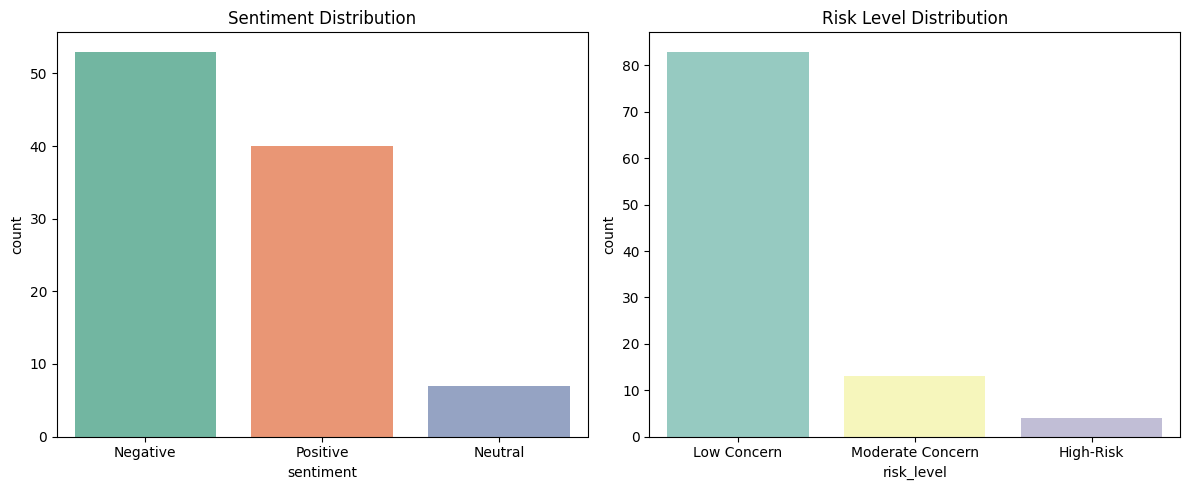

 Classification complete! File saved as 'classified_tweets.csv'


In [2]:
# Plot distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x="sentiment", data=df, palette="Set2")
plt.title("Sentiment Distribution")

plt.subplot(1, 2, 2)
sns.countplot(x="risk_level", data=df, palette="Set3")
plt.title("Risk Level Distribution")

plt.tight_layout()
plt.show()

# Save for later tasks
df.to_csv("/content/classified_tweets.csv", index=False)
print(" Classification complete! File saved as 'classified_tweets.csv'")